# Assignment04 12132191 陈鹏翰

In [5]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%config Completer.use_jedi = False
mpl.rcParams['hatch.linewidth'] = 0.5

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## 1. Global Earthquakes

### In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [2]:
df_eqs=pd.read_csv('usgs_earthquakes.csv')
lon=df_eqs[df_eqs['mag']>=6.5]['longitude'].values
lat=df_eqs[df_eqs['mag']>=6.5]['latitude'].values
mag=df_eqs[df_eqs['mag']>=6.5]['mag'].values

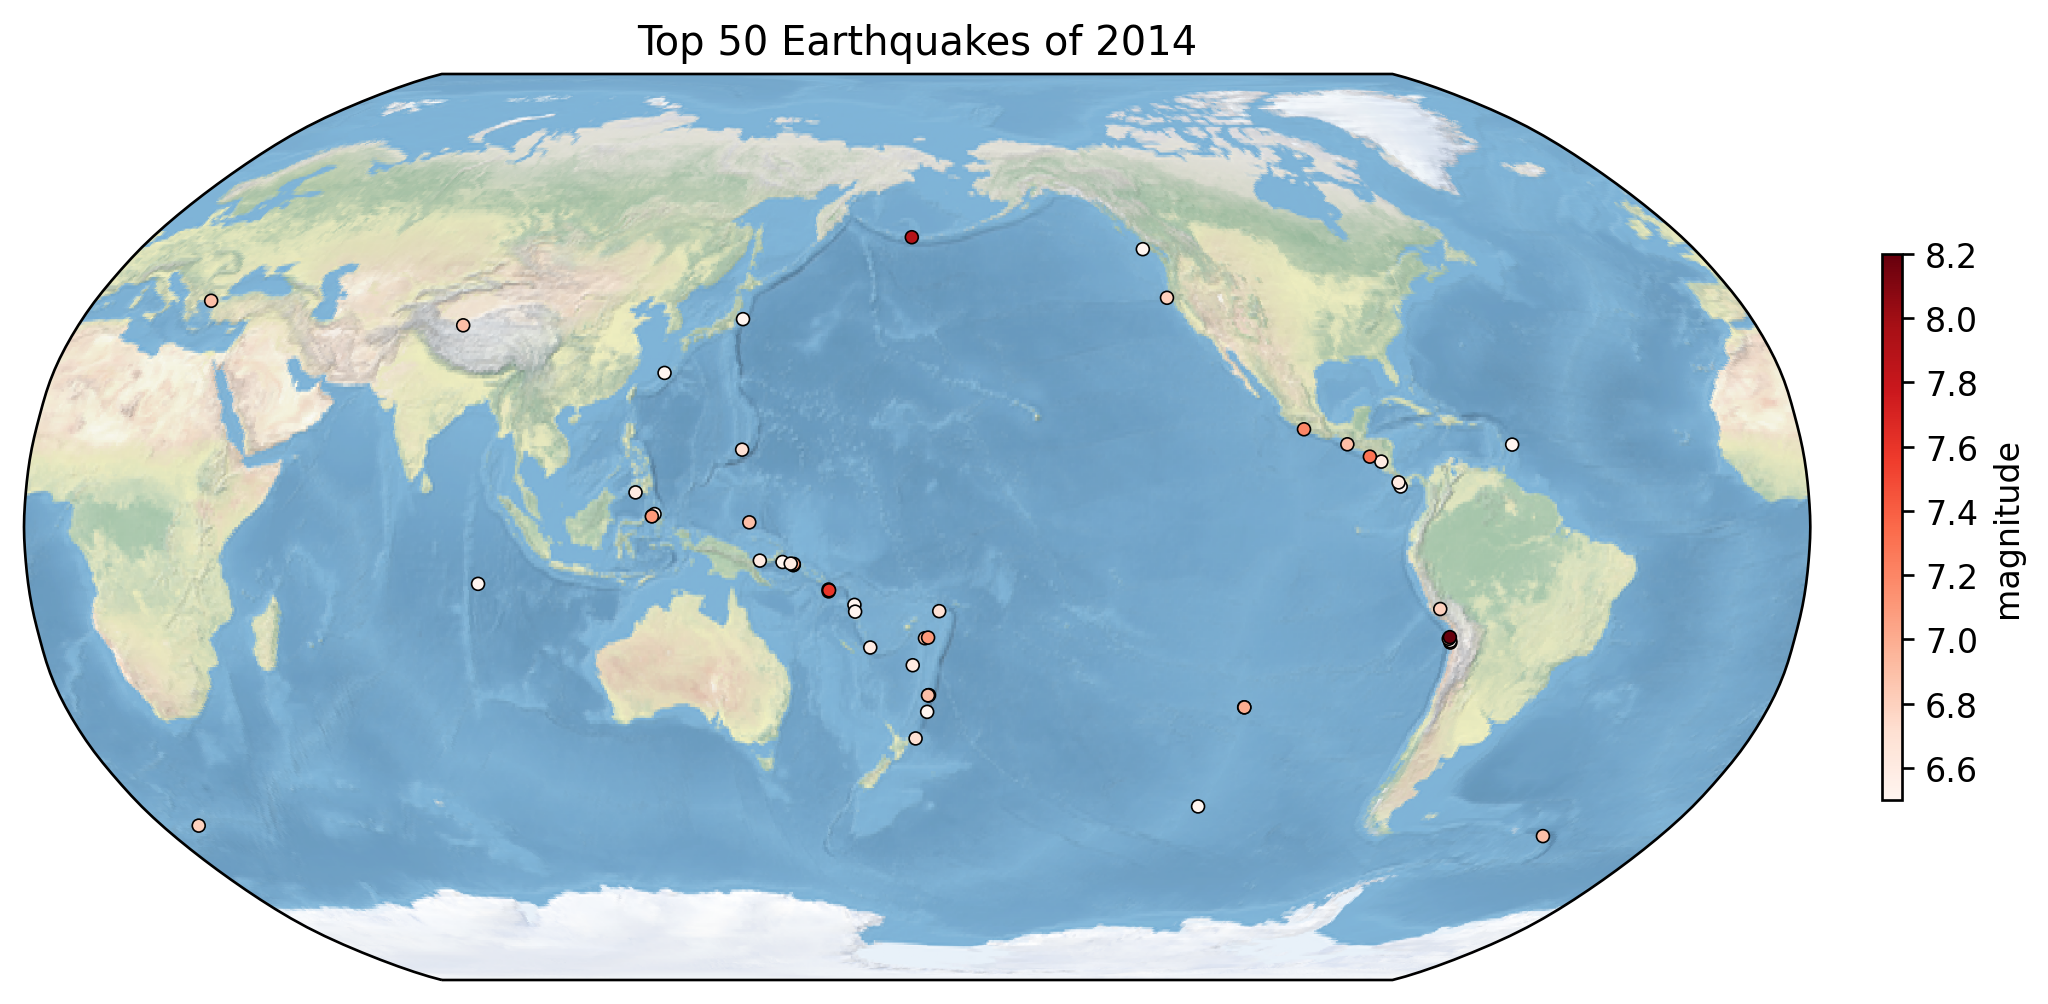

In [3]:
fig = plt.figure(figsize=(10, 5),dpi=240)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.stock_img()
ax.set_title('Top 50 Earthquakes of 2014')
ax.scatter(lon,lat,c=mag ,transform=ccrs.PlateCarree(),vmin=6.5, vmax=8.2, cmap='Reds',
           marker='o',edgecolors='k',s=15, linewidths=0.5)
pos = ax.get_position()
pad = 0.03
width = 0.008
ticks = list(np.linspace(6.6, 8.2, 9))
norm = mpl.colors.Normalize(6.5,8.2)
cax = fig.add_axes([pos.xmax + pad, pos.ymin+0.15, width, (pos.ymax - pos.ymin)-0.3])
cmap=plt.cm.get_cmap('Reds')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,norm=norm,ticks=ticks, orientation='vertical')
cbar.ax.set_ylabel('magnitude')
plt.show()

## 2. Explore a netCDF dataset
### Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

### 2.1 Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).
### 2.2 Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [4]:
ds_pr=xr.open_dataset('gswp_pr_2010.nc4')

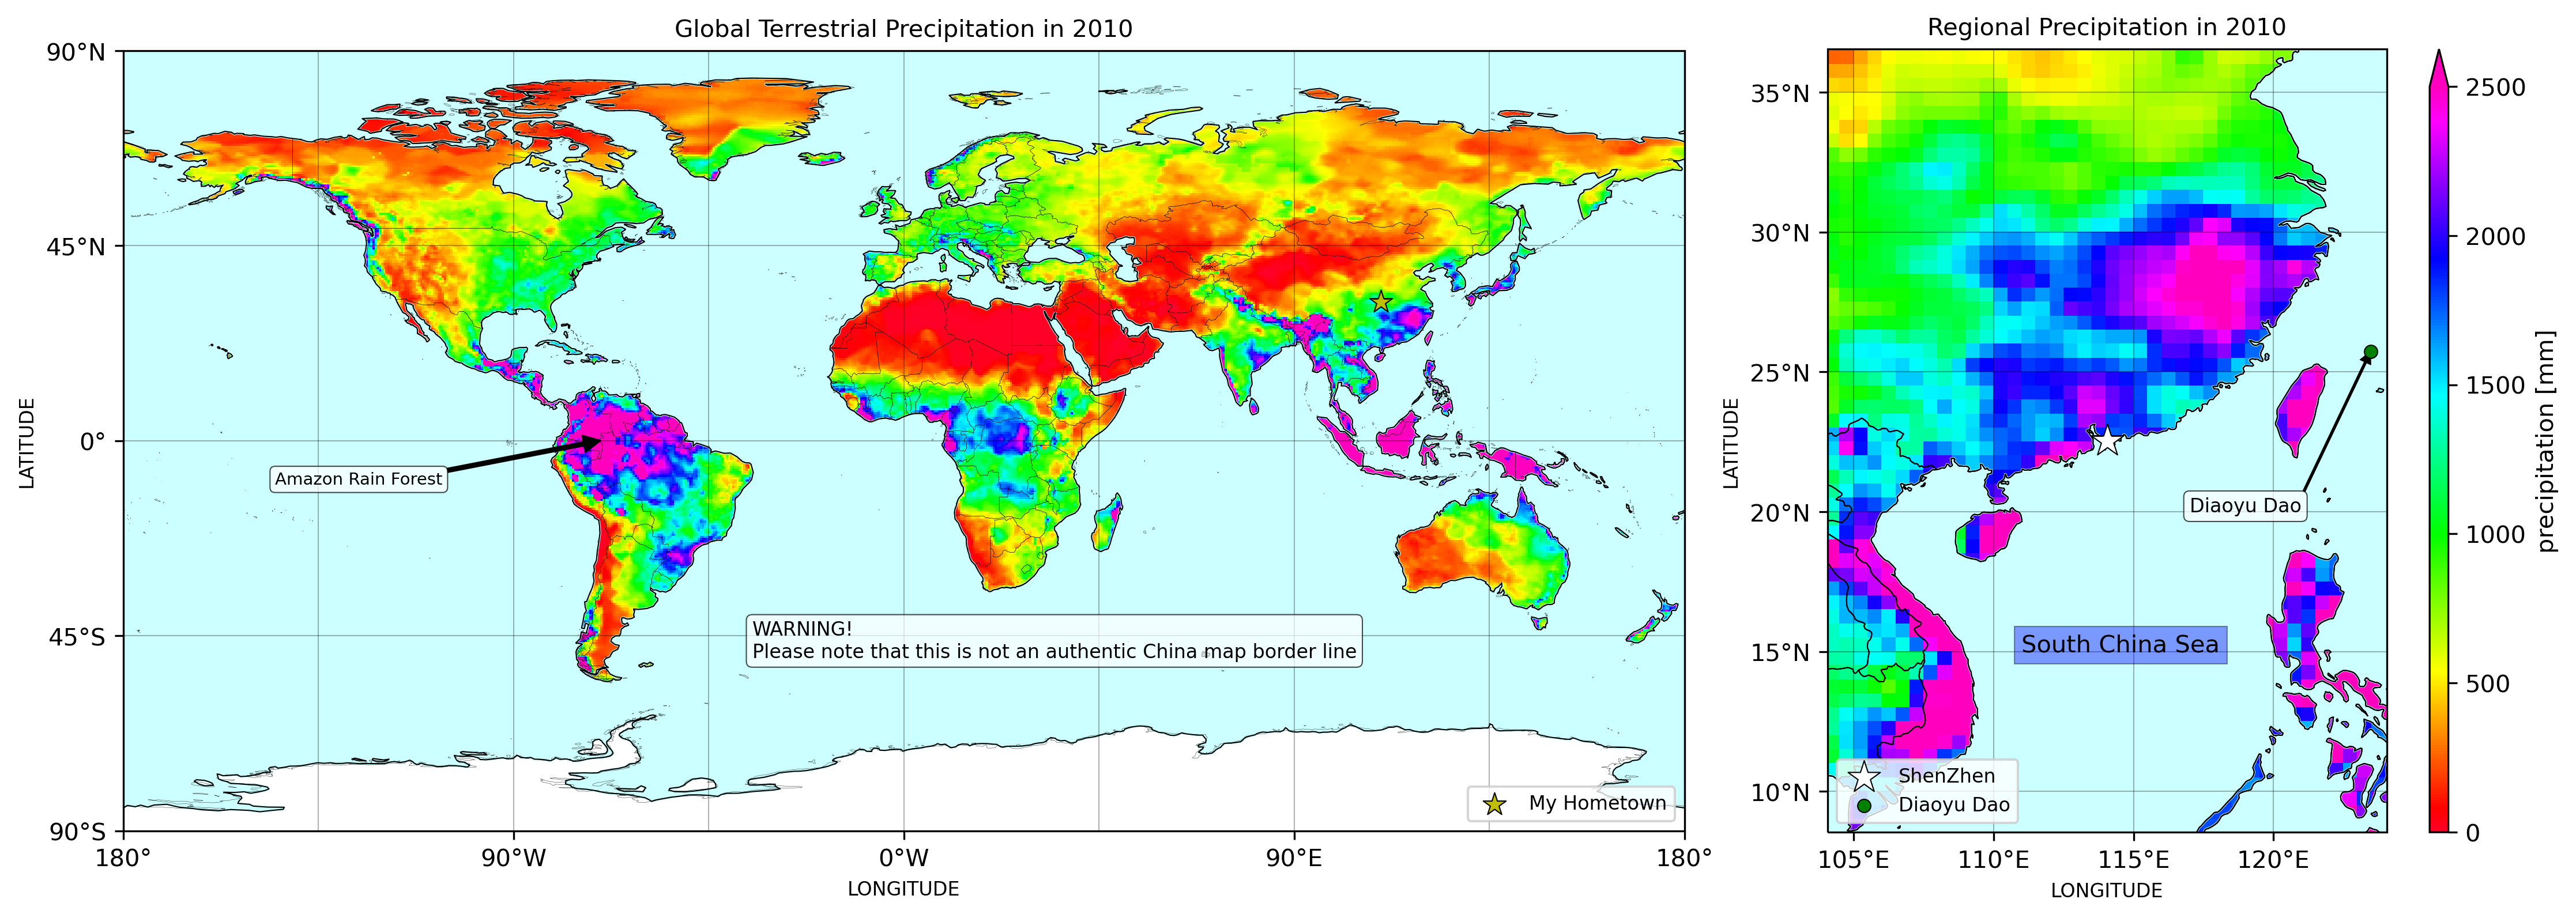

In [9]:
fig = plt.figure(figsize=(18,6),dpi=300)
ax1 = plt.subplot2grid((1,3), (0,0), colspan=2, rowspan=1,projection=ccrs.PlateCarree()) 
ax2 = plt.subplot2grid((1,3), (0,2), rowspan=1,projection=ccrs.PlateCarree())          

# fearture
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1, 
                                           zorder=2))
# gridlines
ax1.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,9)),ylocs=list(np.linspace(-90,90,5)),
                  linewidth=0.5, color='black', alpha=0.3,zorder=3)
# see colorbar in ax2
ds_pr.sel(lat=slice(89,-60)).pr.plot(ax=ax1, transform=ccrs.PlateCarree(),vmax=2500,vmin=0,zorder=0,cmap='gist_rainbow',
          add_colorbar=False)
# fearture
ax1.add_feature(cfeature.OCEAN, facecolor='#CCFFFF',zorder=1)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax1.set_extent([-180,180,-90,90])
# labels and ticks
ax1.tick_params(labelsize=10)
ax1.set_xticks(np.linspace(-180, 180, 5), crs=ccrs.PlateCarree())
ax1.set_yticks(np.linspace(-90, 90, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_xlabel('LONGITUDE',fontsize=8)
ax1.set_ylabel('LATITUDE',fontsize=8)
# annotations
ax1.annotate('Amazon Rain Forest',xy=(-70,0),xytext=(-145,-10),fontsize=7,
             arrowprops=dict(lw=0.7,width=1.5,headwidth=7,headlength=7,color='k'),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
ax1.scatter(110,32,s=100,c='y',marker='*',label='My Hometown',zorder=5,edgecolors='k', linewidths=0.5)
# text box
ax1.text(-35,-50,'WARNING!\nPlease note that this is not an authentic China map border line',
         fontsize=8,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
# legend
ax1.legend(loc=4,fontsize=8)
ax1.set_title("Global Terrestrial Precipitation in 2010",fontsize=10)

ax2.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5, 
                                           zorder=2))
ax2.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,73)),ylocs=list(np.linspace(-90,90,37)),
                  linewidth=0.5, color='black', alpha=0.3,zorder=3)
ds_pr.sel(lat=slice(89,-60)).pr.plot(ax=ax2, transform=ccrs.PlateCarree(),add_colorbar=True,vmax=2500,vmin=0,zorder=0,cmap='gist_rainbow',
                                    cbar_kwargs={'shrink': 1,'pad':0.06,'aspect':40,'label':'precipitation [mm]'})
ax2.add_feature(cfeature.OCEAN, facecolor='#CCFFFF',zorder=1)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5)
central_lon, central_lat = 114.06, 22.54 # Shenzhen
extent = [central_lon-10, central_lon+10, central_lat-14, central_lat+14]

ax2.set_xticks(np.linspace(-180, 180, 73), crs=ccrs.PlateCarree())
ax2.set_yticks(np.linspace(-90, 90, 37), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_xlabel('LONGITUDE',fontsize=8)
ax2.set_ylabel('LATITUDE',fontsize=8)
ax2.annotate('Diaoyu Dao',xy=(123.47,25.73),xytext=(117,20),fontsize=8,
             arrowprops=dict(lw=0.3,width=1,headwidth=5,headlength=5,color='k'),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
ax2.set_extent(extent)
ax2.set_title("Regional Precipitation in 2010",fontsize=10)
ax2.scatter(114.06,22.54,s=200,c='w',marker='*',label='ShenZhen',zorder=5,edgecolors='k', linewidths=0.5)
ax2.scatter(123.47,25.73,s=30,c='g',marker='o',label='Diaoyu Dao',zorder=5,edgecolors='k', linewidths=0.5)
ax2.text(111,15,'South China Sea',
         fontsize=10,bbox=dict(boxstyle='square,pad=0.3', fc='b', ec='black',lw=0.5 ,alpha=0.4))
ax2.legend(loc=3,fontsize=8)

plt.show()